a) 

In [38]:
dt <- read.csv('delhi_aqi.csv') #get data and put in into dt dataframe

bi ) 

In [39]:
summary(dt)#gets a summary of the data 

     date                 co                no              no2        
 Length:18776       Min.   :  260.4   Min.   :  0.00   Min.   :  4.28  
 Class :character   1st Qu.: 1068.1   1st Qu.:  0.68   1st Qu.: 33.93  
 Mode  :character   Median : 1842.5   Median :  5.25   Median : 54.15  
                    Mean   : 2929.2   Mean   : 33.66   Mean   : 66.22  
                    3rd Qu.: 3685.0   3rd Qu.: 35.76   3rd Qu.: 83.63  
                    Max.   :21148.7   Max.   :500.68   Max.   :460.62  
       o3              so2             pm2_5              pm10        
 Min.   :  0.00   Min.   :  5.25   Min.   :  11.83   Min.   :  15.07  
 1st Qu.:  0.34   1st Qu.: 34.81   1st Qu.:  84.44   1st Qu.: 118.80  
 Median : 27.18   Median : 52.93   Median : 157.44   Median : 209.71  
 Mean   : 60.35   Mean   : 66.69   Mean   : 238.13   Mean   : 300.09  
 3rd Qu.: 92.98   3rd Qu.: 82.02   3rd Qu.: 313.00   3rd Qu.: 387.96  
 Max.   :801.09   Max.   :579.83   Max.   :1708.09   Max.   :1969.93  

In [40]:
class(dt)#see what data type 

[1] "data.frame"

In [41]:
str(dt)#see what kind of data type is stored in it 

'data.frame':	18776 obs. of  9 variables:
 $ date : chr  "2020-11-25 01:00:00" "2020-11-25 02:00:00" "2020-11-25 03:00:00" "2020-11-25 04:00:00" ...
 $ co   : num  2617 3632 4539 4539 4379 ...
 $ no   : num  2.18 23.25 52.75 50.96 42.92 ...
 $ no2  : num  70.6 89.1 100.1 111 117.9 ...
 $ o3   : num  13.59 0.33 1.11 6.44 17.17 ...
 $ so2  : num  38.6 54.4 68.7 78.2 87.7 ...
 $ pm2_5: num  365 421 464 455 448 ...
 $ pm10 : num  412 486 542 534 529 ...
 $ nh3  : num  28.6 41 49.1 48.1 46.6 ...


In [42]:
nrow(dt) #number of row 

[1] 18776

In [43]:
ncol(dt) #number of columns 

[1] 9

In [44]:
any(is.na(dt)) #find if there's any missing data

[1] FALSE

bii) no mising values so doesn't affect the data 

biii) The data set has many numerical variable columns and a large range with possibel outliers so the best way to get the bin width is using the Freedman-Diaconis Rule which is bin width = (2xIQR(x))/n^(1/3)

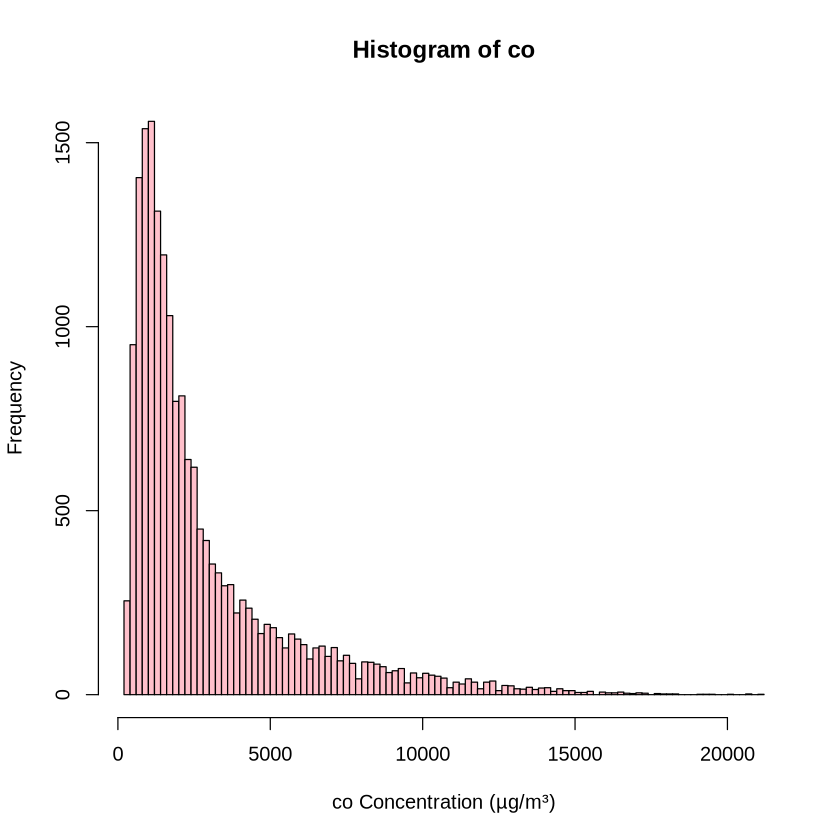

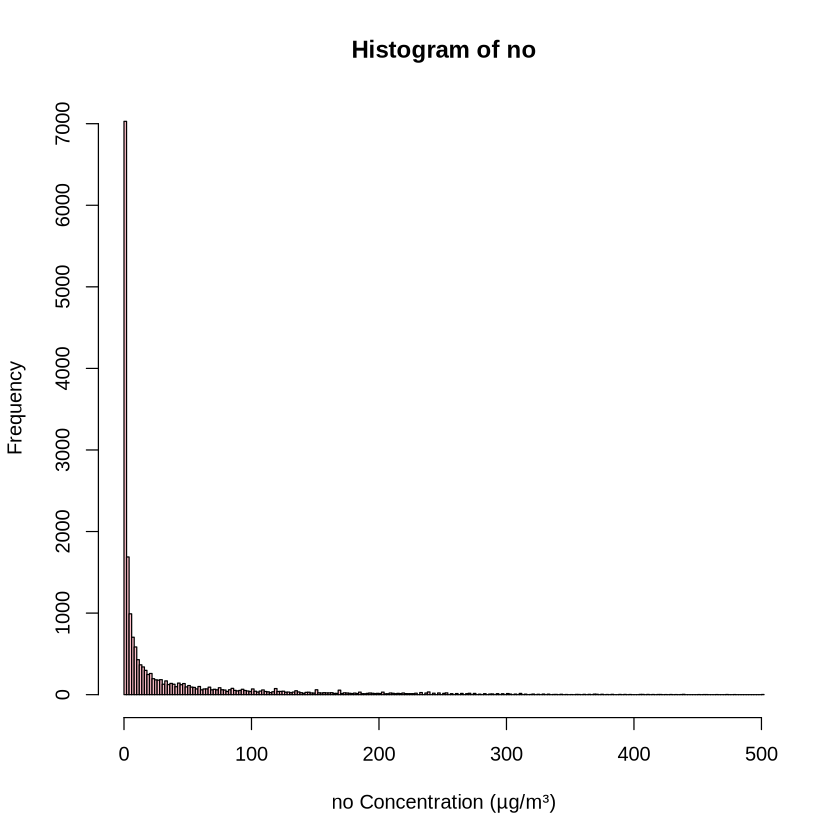

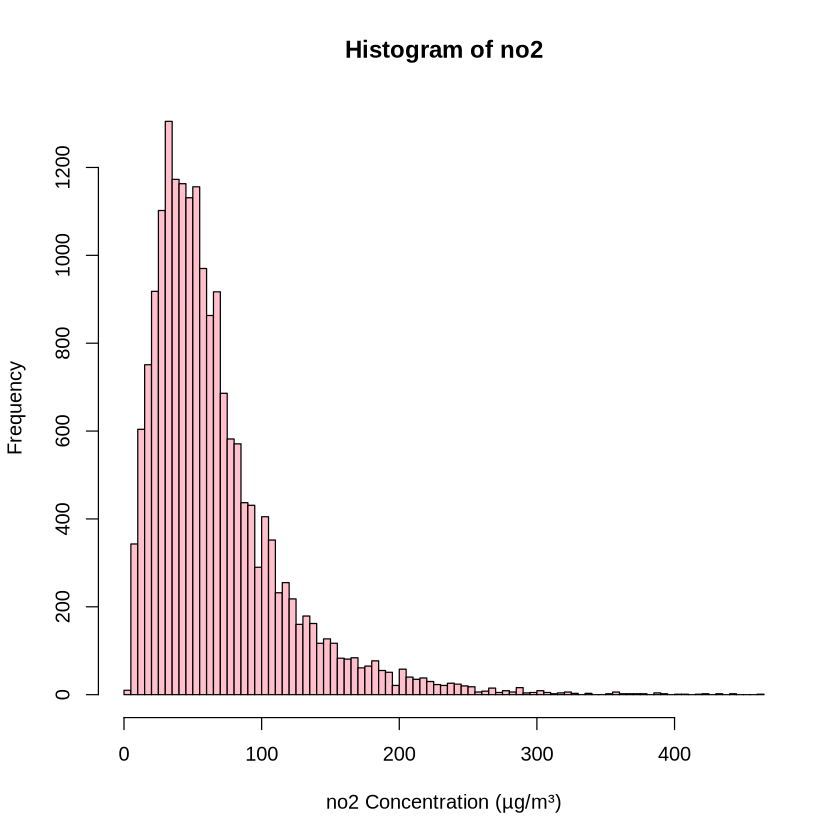

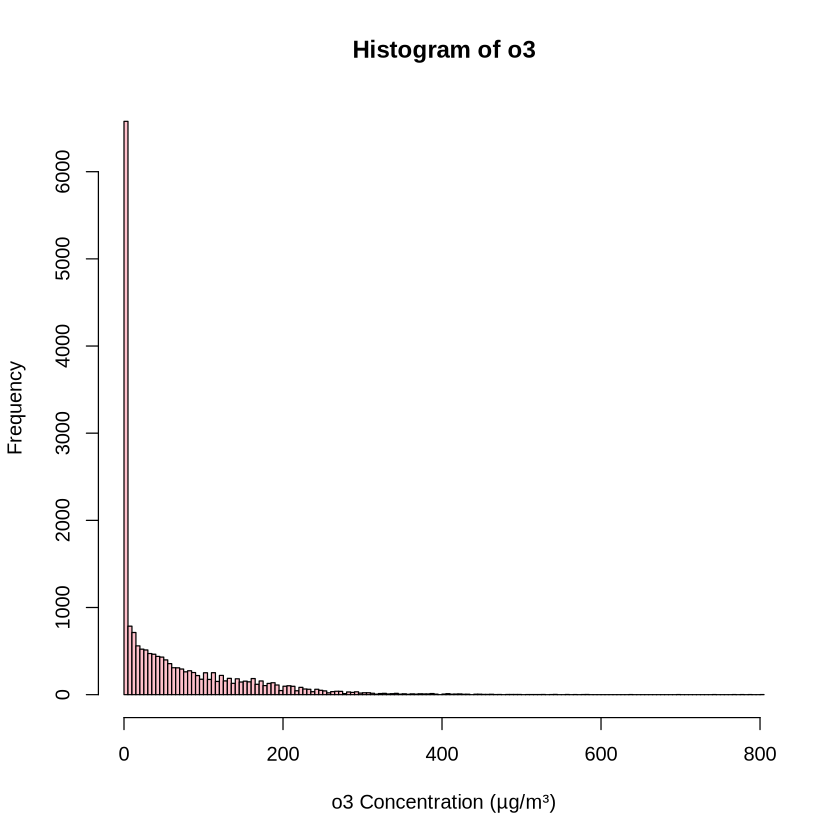

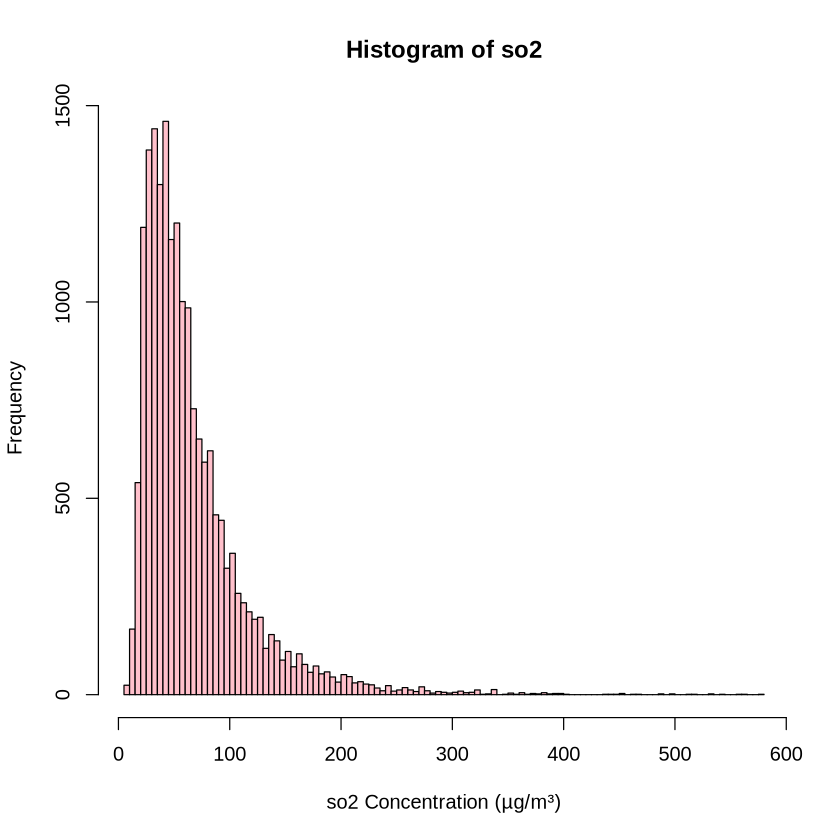

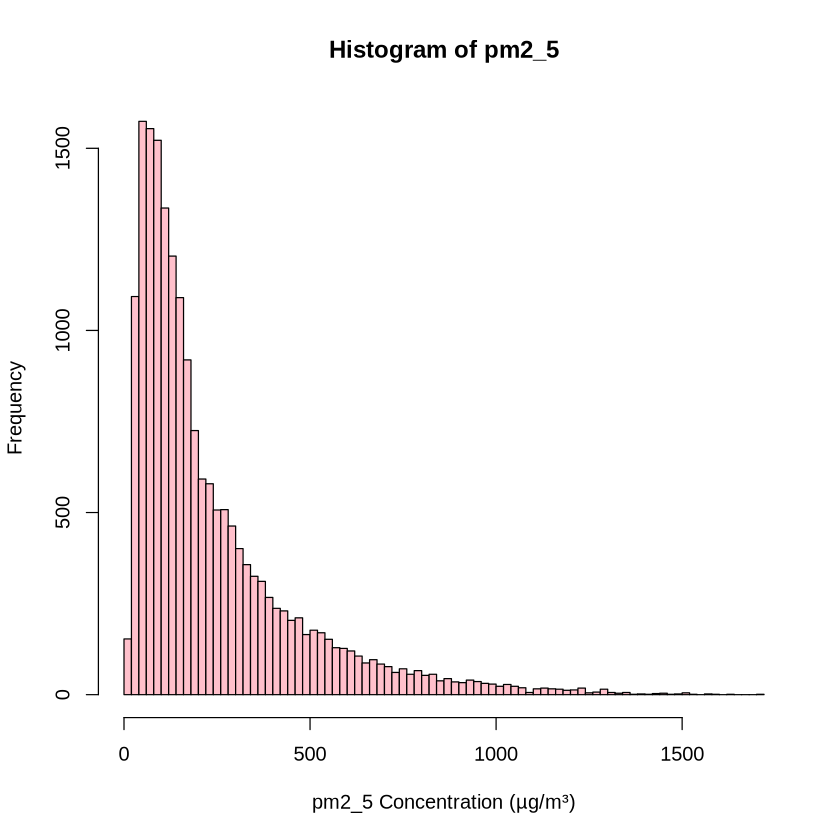

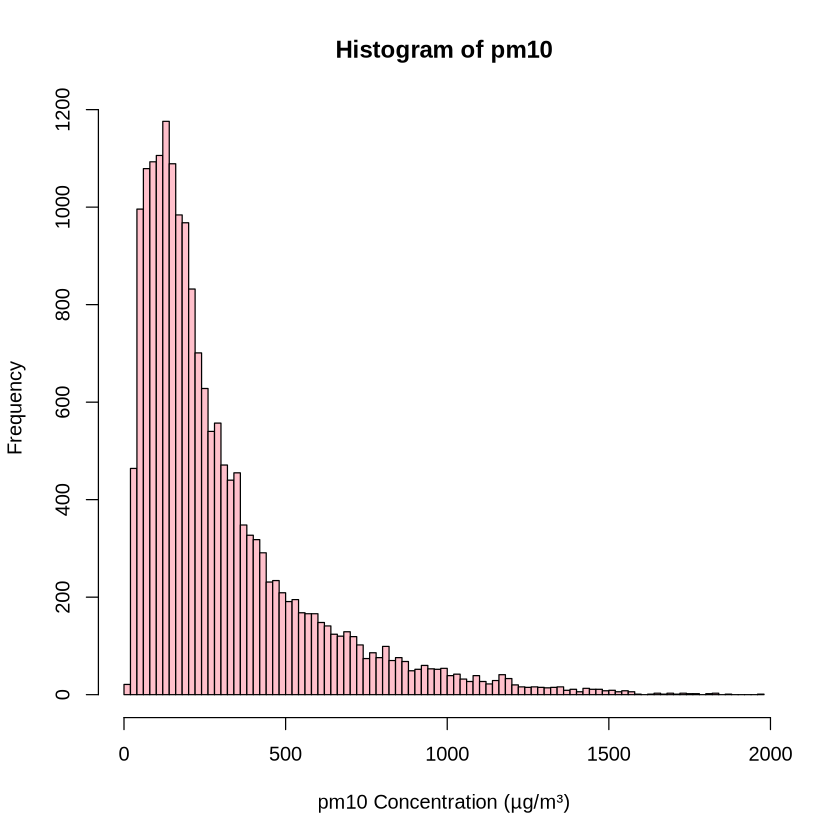

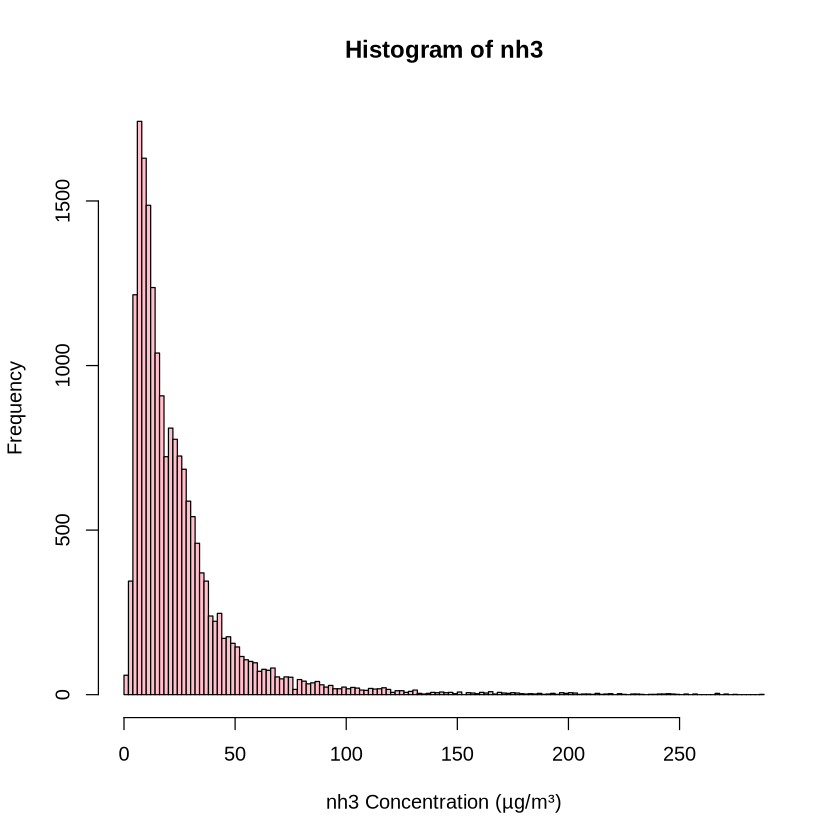

In [45]:
histo <- list() #create empty list to store histograms

#from the collumns in the data frame
for ( collumn in names(dt)) {
    #if the data is numeric
    if ( is.numeric(dt[[collumn]]))  {
        #Freedman-Diaconis Method 
        iqr_v <- IQR(dt[[collumn]]) #gets IQR value for that specific collumn 
        n <- length(dt[[collumn]])
        bin_w <- ((2*iqr_v)/(n**(1/3)))

        #number of bins 
        n_bins <- ceiling((max(dt[[collumn]]) - min(dt[[collumn]])) / bin_w) #using ceiling to round up, but divides total range by bin width to get number of bins  

        #create and store histogram in list 
        histo[[paste0("hist_",collumn)]] <- hist(dt[[collumn]], #create a historgram of that collumn and name it
             main = paste("Histogram of", collumn), #names the histogram 
             xlab = paste(collumn,'Concentration (µg/m³)'), #name the x-axis he same as the collumn
             col = 'pink',
             breaks =n_bins )#makes it pink 
        #plot the histograms 
        #plot(histo[[paste0("hist_",collumn)]])
    }
 }

From the summary function i can see that no,no2,o3,so2 and nh3 are similar in range.

Pm2_5 and pm10 have a similar range.

co doesn't have the same range or unit as any of them.


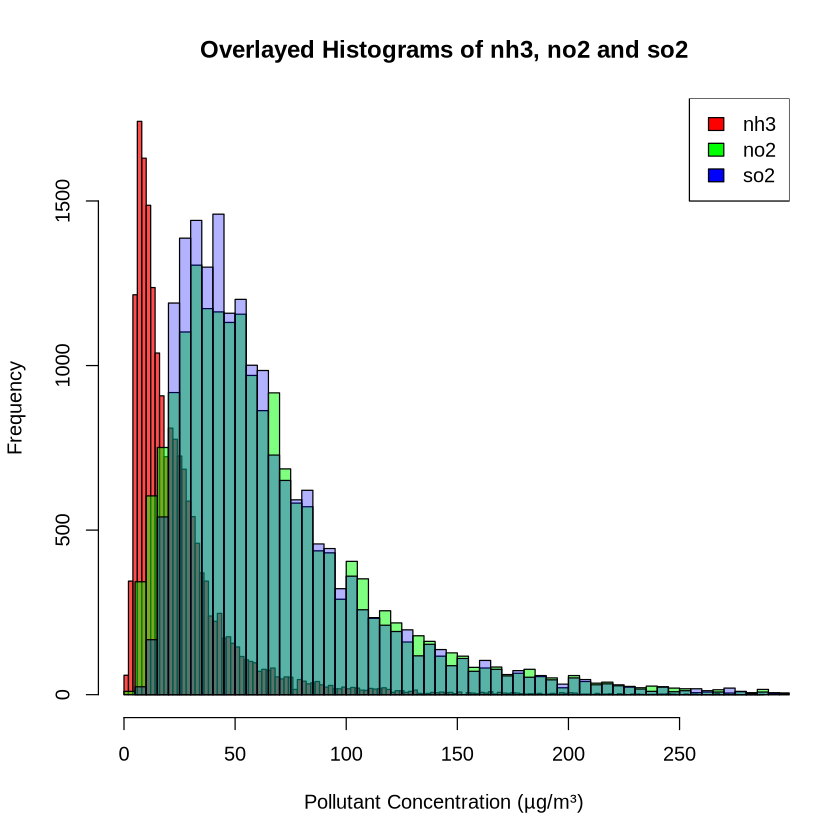

In [46]:
#Overlaying no2,so2 and nh3
plot(histo[["hist_nh3"]], col =adjustcolor('red',alpha.f=0.7),xlab='Pollutant Concentration (µg/m³)',main='Overlayed Histograms of nh3, no2 and so2')
plot(histo[["hist_no2"]], col =adjustcolor('green',alpha.f=0.5),add=TRUE)
plot(histo[["hist_so2"]], col =adjustcolor('blue',alpha.f=0.3),add=TRUE)
#adding legend
legend('topright',legend=c('nh3','no2','so2'),fill=adjustcolor(c('red','green','blue')))

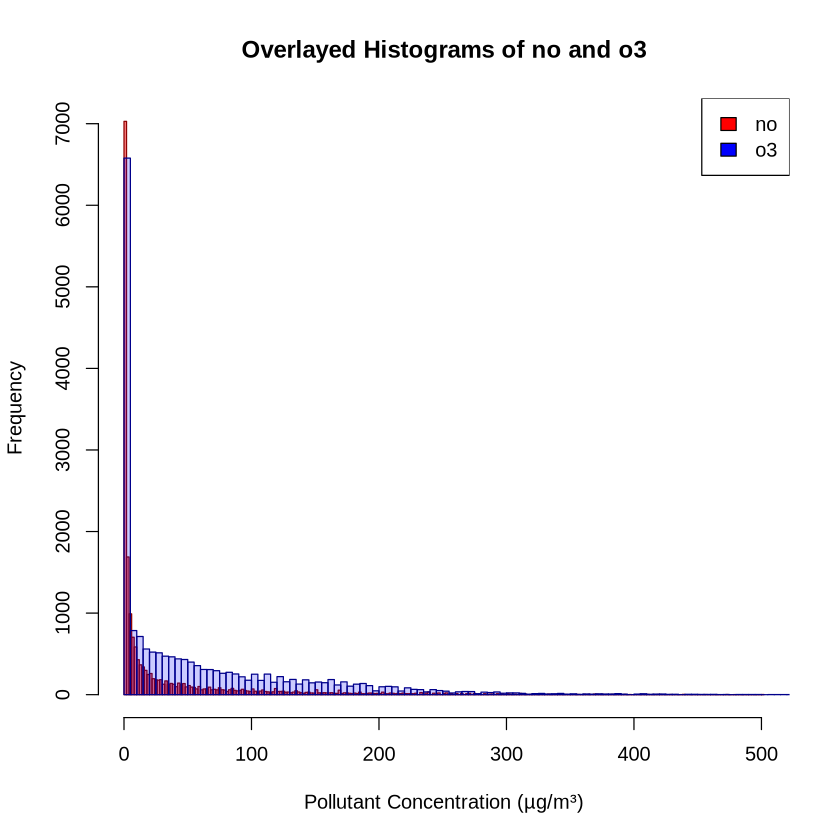

In [47]:
#overlaying no and o3
plot(histo[["hist_no"]], col =adjustcolor('red',alpha.f=0.5),xlab='Pollutant Concentration (µg/m³)',border='darkred',main='Overlayed Histograms of no and o3')
plot(histo[["hist_o3"]], col =adjustcolor('blue',alpha.f=0.2),border=('darkblue'),add=TRUE)
#adding legen
legend('topright',legend=c('no','o3'),fill=adjustcolor(c('red','blue')))

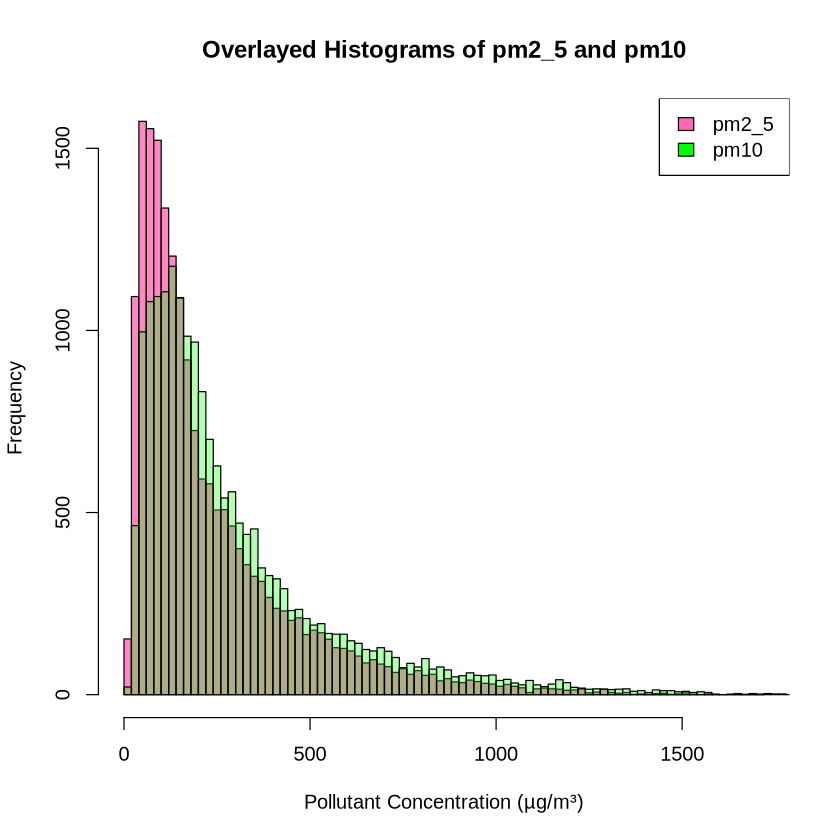

In [48]:
#overlaying pm2_5 and pm10
plot(histo[["hist_pm2_5"]], col =adjustcolor('hotpink',alpha.f=0.8),xlab='Pollutant Concentration (µg/m³)',main='Overlayed Histograms of pm2_5 and pm10')
plot(histo[["hist_pm10"]], col =adjustcolor('green',alpha.f=0.3),add=TRUE)
#adding legend
legend('topright',legend=c('pm2_5','pm10'),fill=adjustcolor(c('hotpink','green')))

biv)

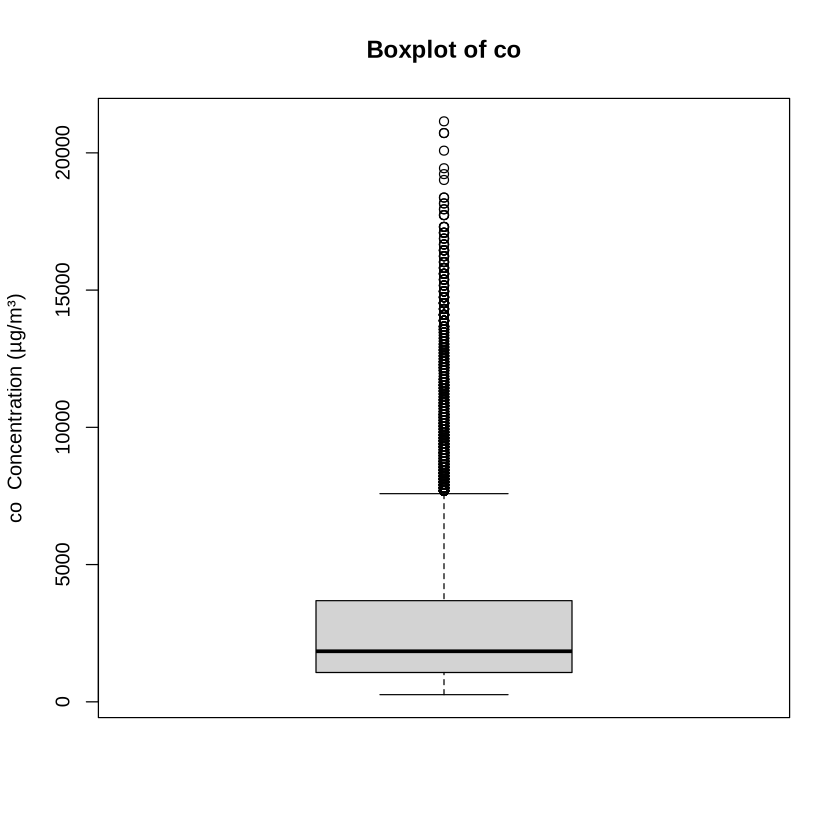

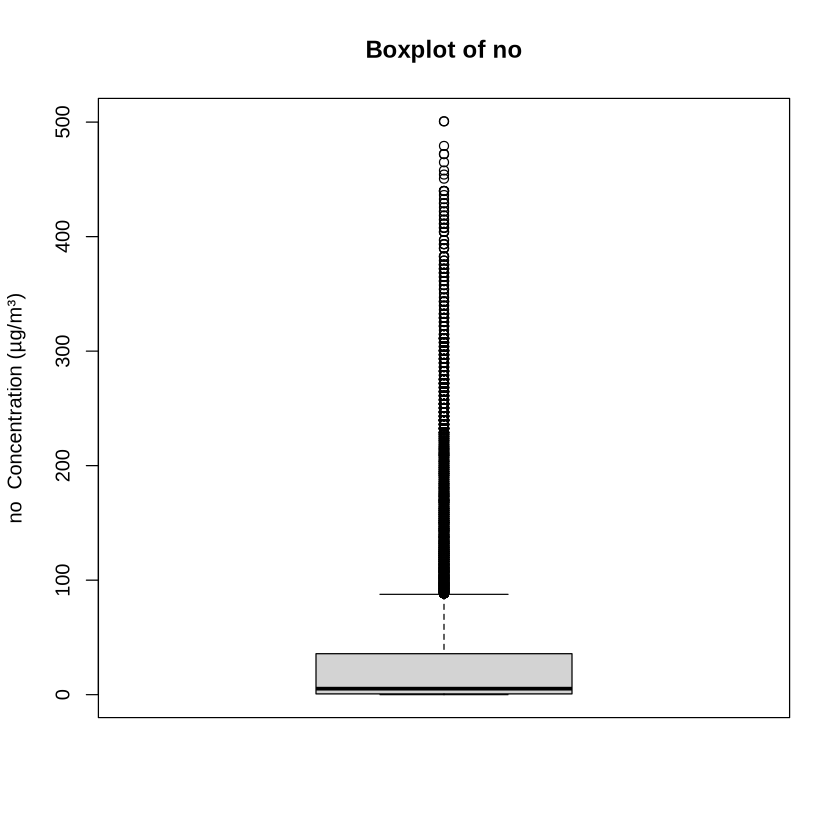

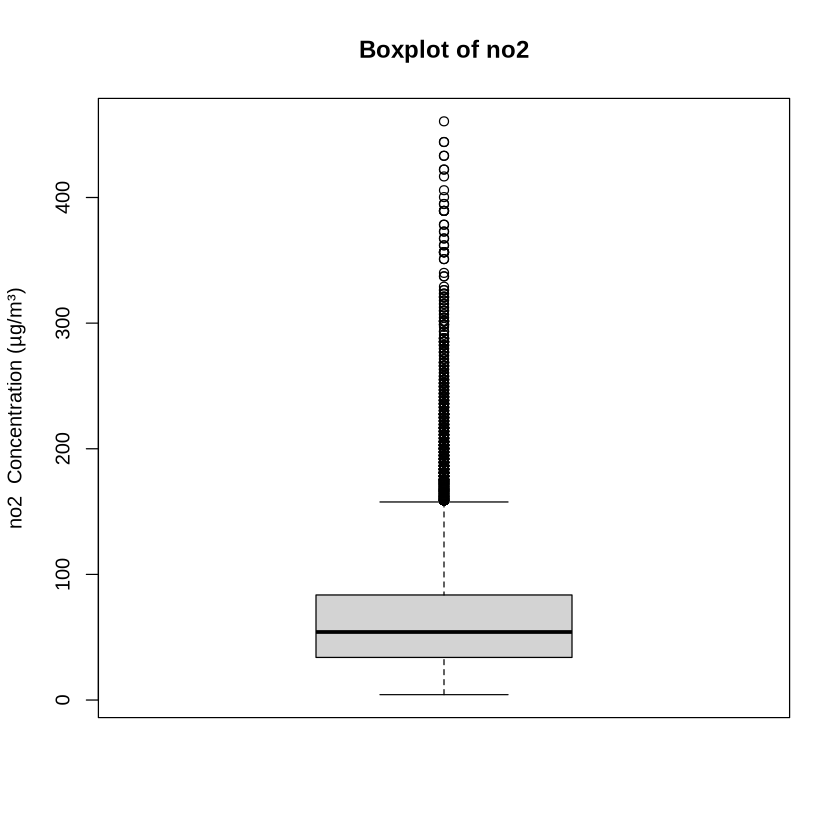

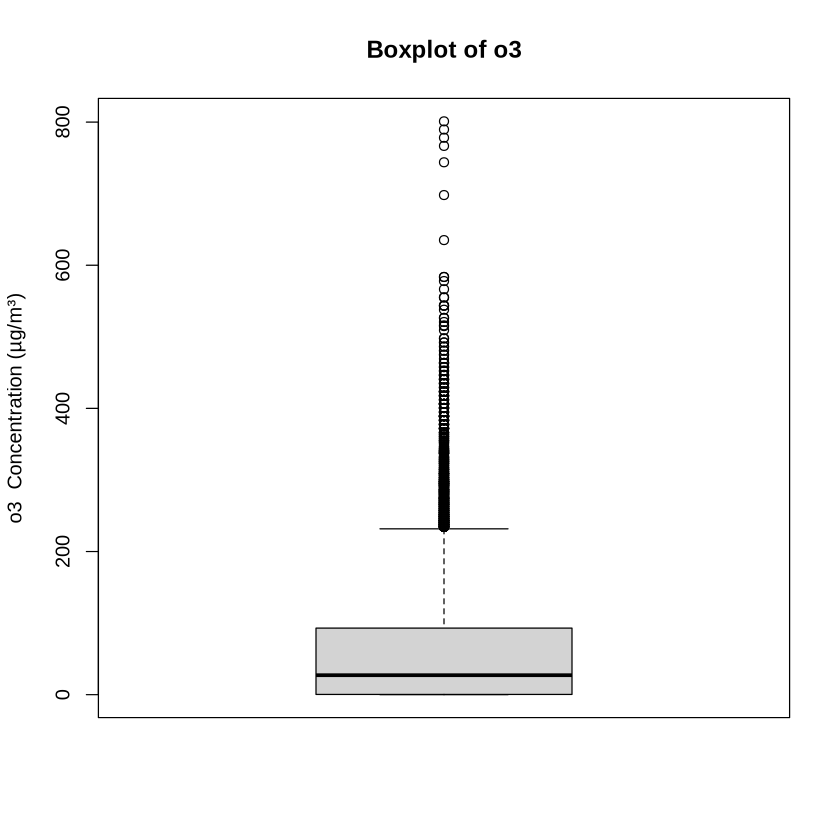

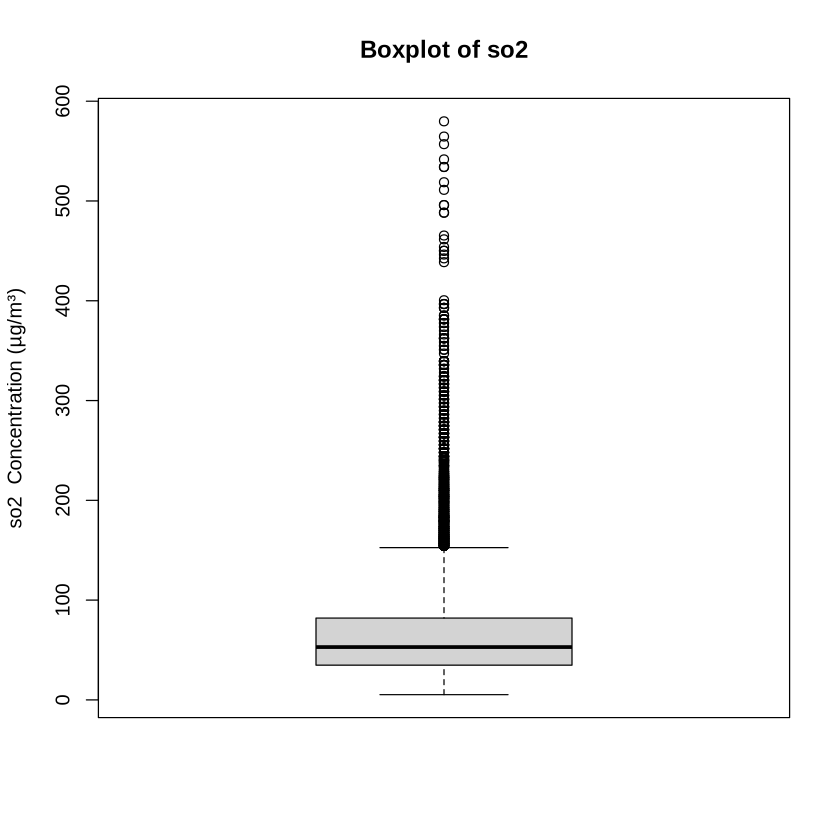

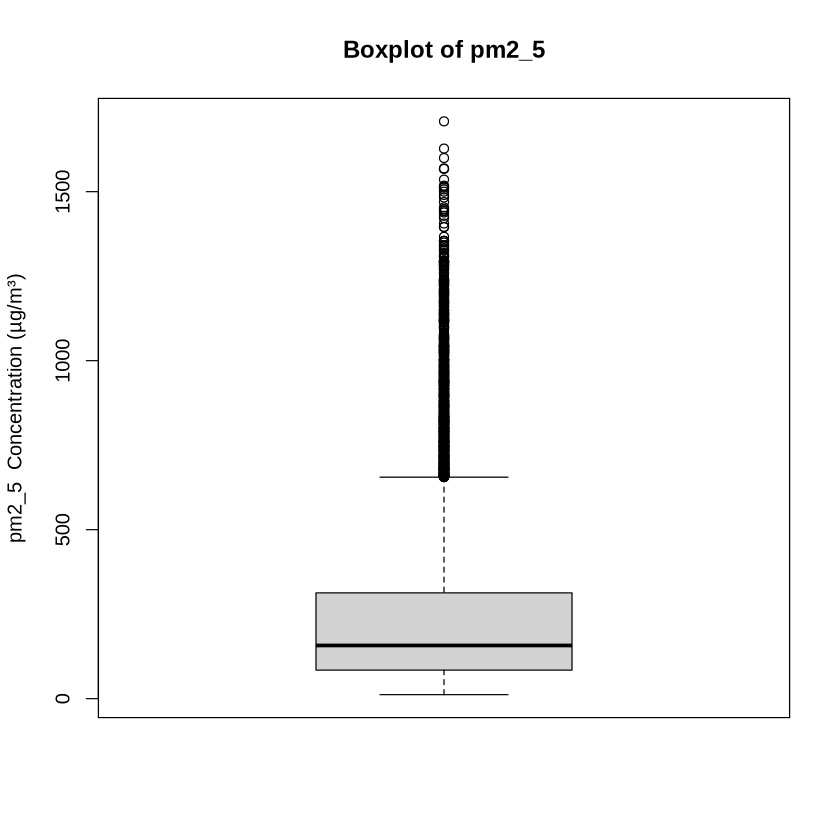

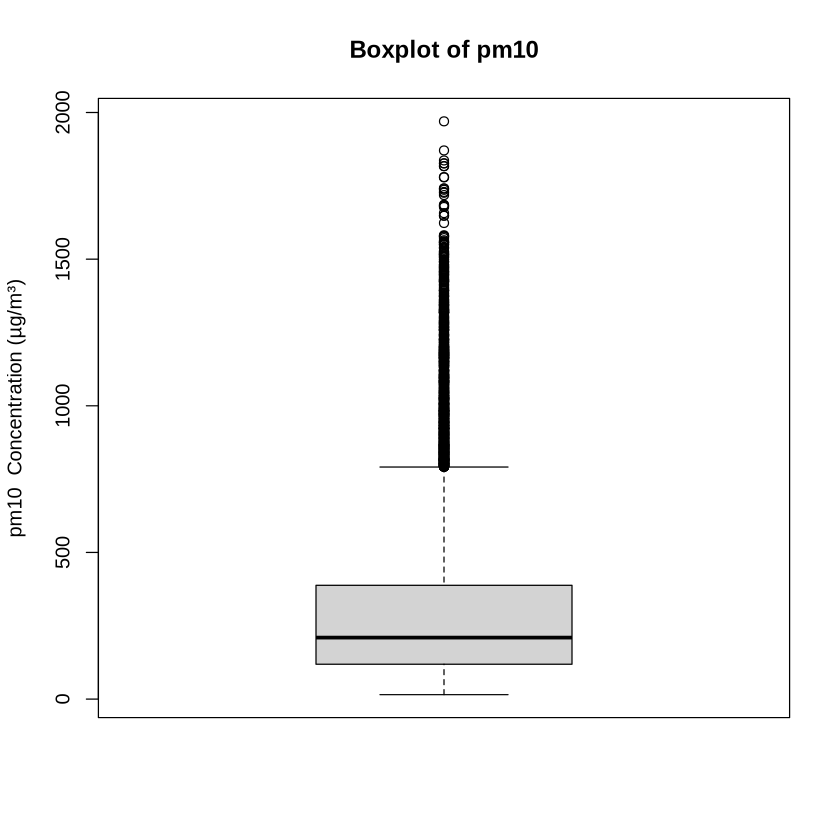

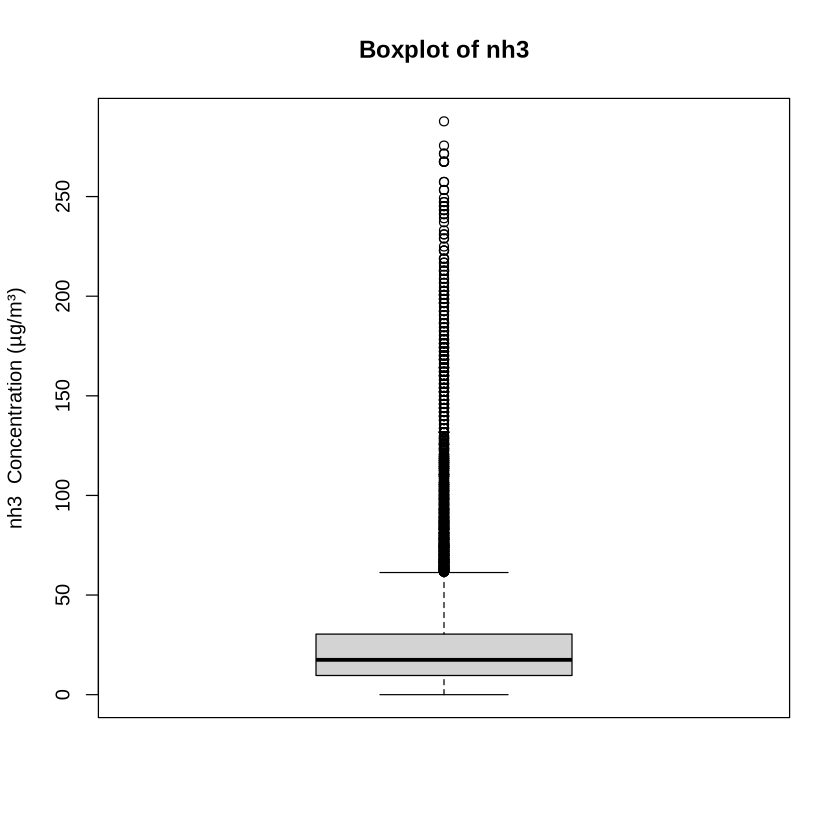

In [49]:
#for statement with the collumns in the data frame
for ( collumn in names(dt)) {
    #if the data is numeric
    if ( is.numeric(dt[[collumn]]))  {
        #create bokplot
        boxplot(dt[[collumn]], ylab= paste(collumn,' Concentration (µg/m³)'),
                #name boxplot
                main = paste("Boxplot of", collumn))
    }
 }

In [50]:
describe each boxplot 

ERROR: Error in parse(text = x, srcfile = src): <text>:1:10: unexpected symbol
1: describe each
             ^


bv)

In [51]:
# geting ride of the non-numeric collumn aka the date one
dt_numeric <- dt[sapply(dt, is.numeric)]  # Keeps only numeric columns

# Getting Pearson correlation matrix
corr_matrix <- cor(dt_numeric, use = "complete.obs", method = "pearson")

# Print the correlation matrix
print(corr_matrix)

              co         no        no2         o3       so2      pm2_5
co     1.0000000  0.9141286  0.7642007 -0.4022842 0.5342267  0.9368297
no     0.9141286  1.0000000  0.5577118 -0.3549046 0.4987193  0.8164405
no2    0.7642007  0.5577118  1.0000000 -0.3436092 0.7103714  0.7018404
o3    -0.4022842 -0.3549046 -0.3436092  1.0000000 0.0132044 -0.2866606
so2    0.5342267  0.4987193  0.7103714  0.0132044 1.0000000  0.4884759
pm2_5  0.9368297  0.8164405  0.7018404 -0.2866606 0.4884759  1.0000000
pm10   0.9502183  0.8299098  0.7119980 -0.2948250 0.4918886  0.9892910
nh3    0.7849508  0.7243421  0.7183993 -0.2759834 0.6284445  0.6444463
            pm10        nh3
co     0.9502183  0.7849508
no     0.8299098  0.7243421
no2    0.7119980  0.7183993
o3    -0.2948250 -0.2759834
so2    0.4918886  0.6284445
pm2_5  0.9892910  0.6444463
pm10   1.0000000  0.6860808
nh3    0.6860808  1.0000000


corrplot 0.92 loaded



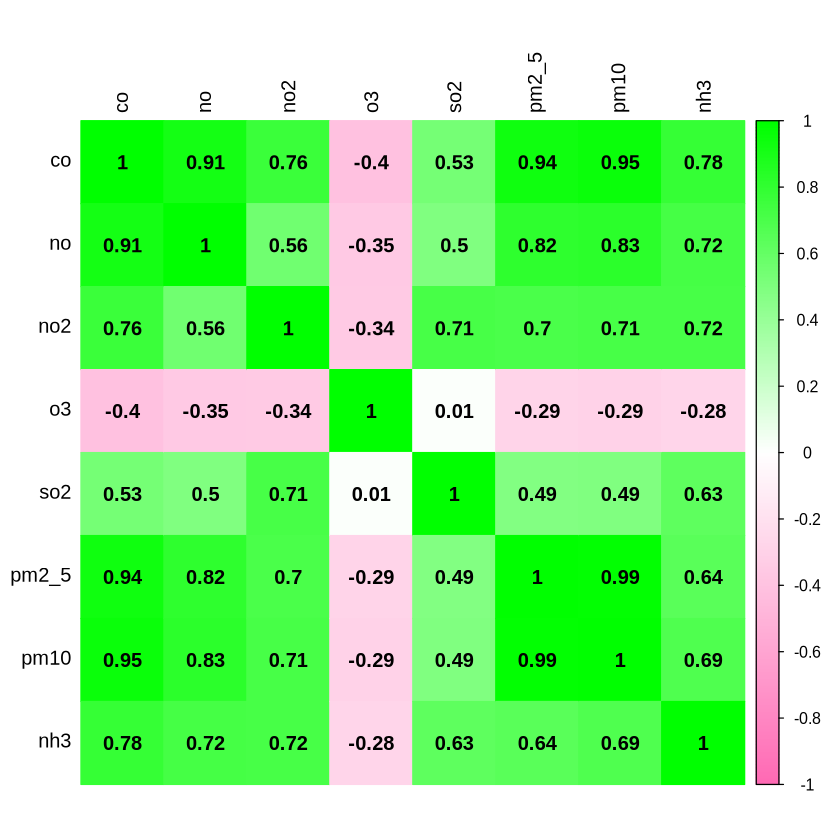

In [53]:
#Heatmap 
library(corrplot)
corrplot(corr_matrix, method='color',
         col = colorRampPalette(c('hotpink','white','green'))(200),
         addCoef.col='black',
        tl.col='black')

Scatter graph if correleation was higher than 0.9 or lower than -0.9
- pm10 and pm2.5
- pm10 and co
- no and co
- co and pm2.5

`geom_smooth()` using formula = 'y ~ x'


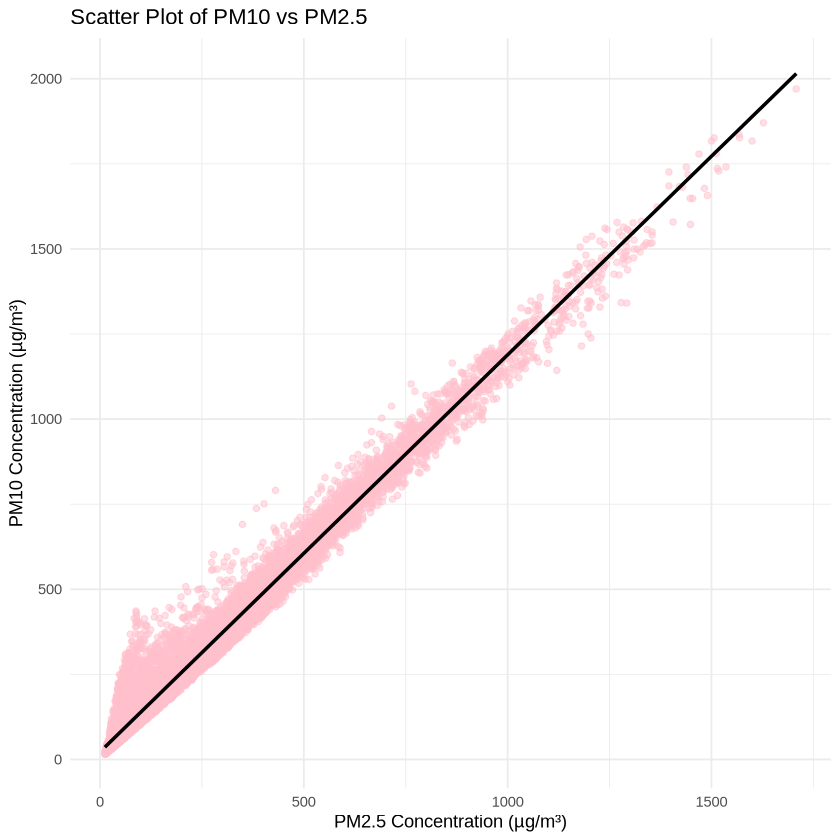

In [16]:
#scatter graph for PM10 vs PM2.5
library(ggplot2)
ggplot(dt,aes(x=pm2_5,y=pm10)) + 
    geom_point(alpha = 0.5, color = 'pink') +
    geom_smooth(method='lm',col='black')+
    ggtitle('Scatter Plot of PM10 vs PM2.5')+
    xlab('PM2.5 Concentration (µg/m³)')+
    ylab('PM10 Concentration (µg/m³)')+
    theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


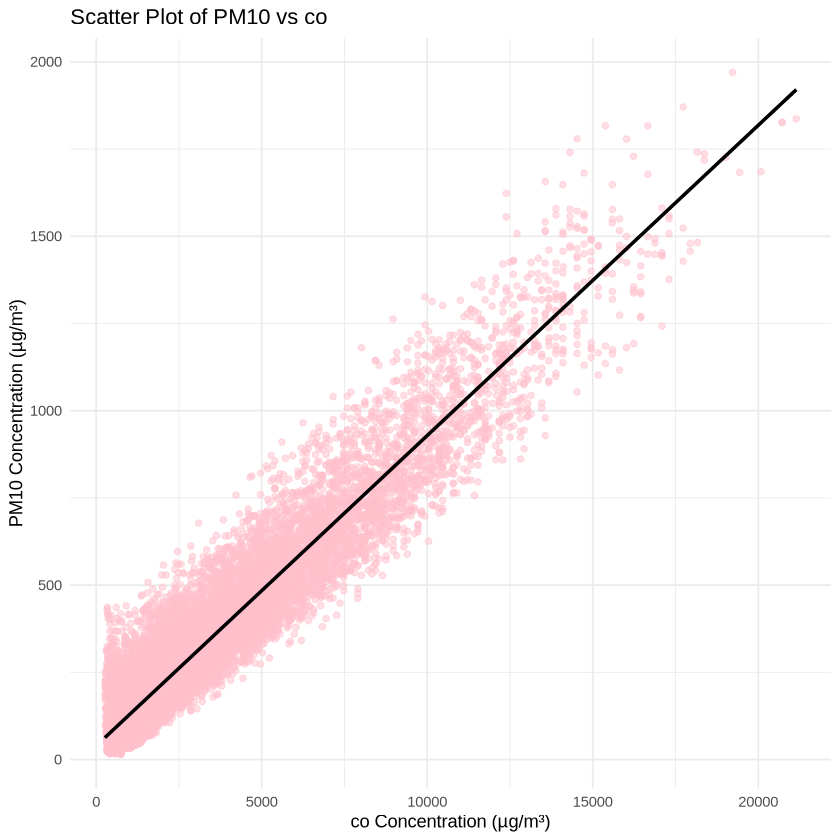

In [17]:
#scatter graph for PM10 vs co
library(ggplot2)
ggplot(dt,aes(x=co,y=pm10)) + 
    geom_point(alpha = 0.5, color = 'pink') +
    geom_smooth(method='lm',col='black')+
    ggtitle('Scatter Plot of PM10 vs co')+
    xlab('co Concentration (µg/m³)')+
    ylab('PM10 Concentration (µg/m³)')+
    theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


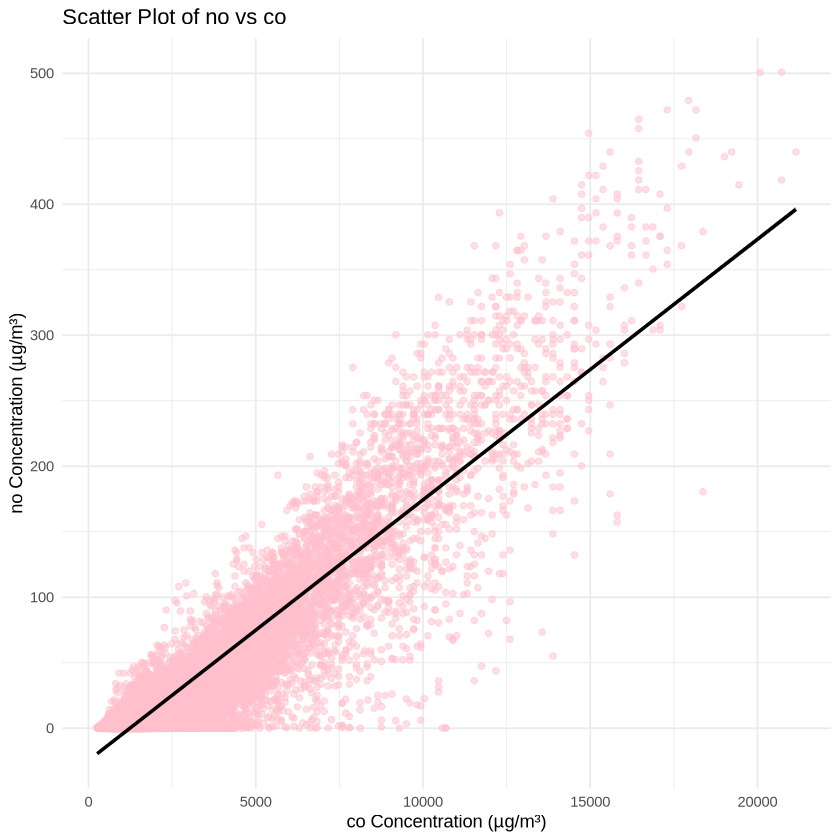

In [18]:
#scatter graph for no vs co
library(ggplot2)
ggplot(dt,aes(x=co,y=no)) + 
    geom_point(alpha = 0.5, color = 'pink') +
    geom_smooth(method='lm',col='black')+
    ggtitle('Scatter Plot of no vs co')+
    xlab('co Concentration (µg/m³)')+
    ylab('no Concentration (µg/m³)')+
    theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


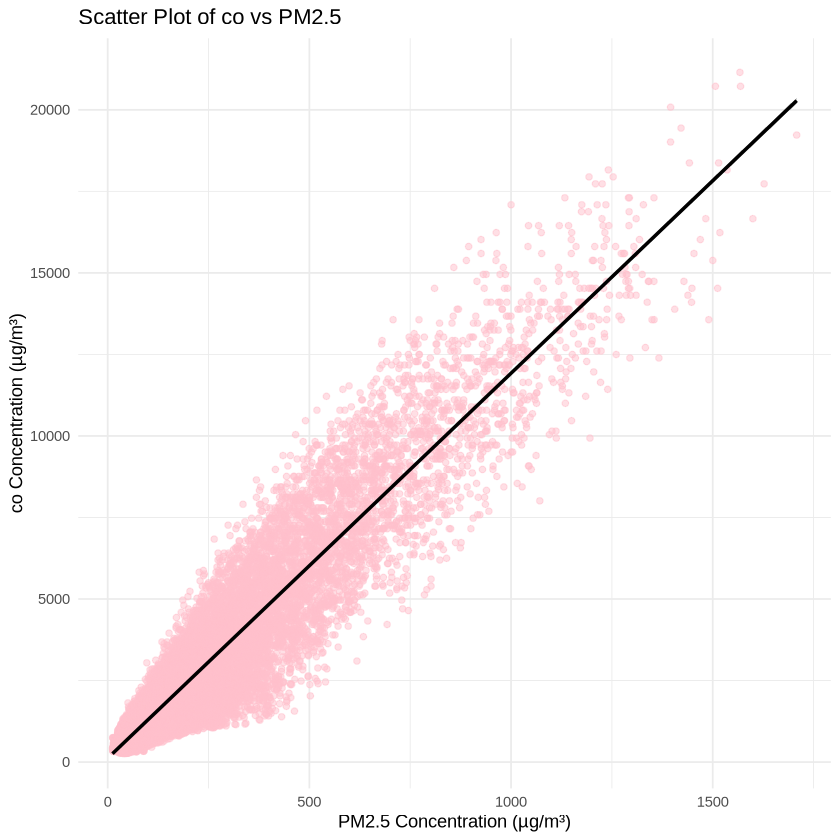

In [19]:
#scatter graph for co vs PM2.5
library(ggplot2)
ggplot(dt,aes(x=pm2_5,y=co)) + 
    geom_point(alpha = 0.5, color = 'pink') +
    geom_smooth(method='lm',col='black')+
    ggtitle('Scatter Plot of co vs PM2.5')+
    xlab('PM2.5 Concentration (µg/m³)')+
    ylab('co Concentration (µg/m³)')+
    theme_minimal()

bvi)

In [20]:
#creating a fucntion to find mode in R
mode_f <- function(x) {
    unique_v <- unique(x) # find unique values 
    freq <- tabulate(match(x,unique_v)) # find frequency 
    mode_v <- unique_v[which.max(freq)] #find which one has max frequency
    return(mode_v)
    }

In [21]:
library(knitr)

#creating a function to get a summary of values 
summary_values <- function(column) { 
    return(c( 
        Mean = mean(column),
        Median = median(column),
        Mode = mode_f(column),
        St_dev = sd(column),
        IQR = IQR(column),
        Q1_  = quantile(column,0.25),
        Q3_  = quantile(column,0.75)
    ))
}

#applying it to all numeric columns 
summary_table <- as.data.frame(t(sapply(dt_numeric, summary_values)))

#adding columns name 
summary_table$Variable <- rownames(summary_table)
rownames(summary_table) <- NULL

#format the table using kable so it looks nice 
library(knitr)
kable(summary_table, caption = "Summary Statistics Table")




Table: Summary Statistics Table

|       Mean|   Median|    Mode|     St_dev|       IQR|   Q1_.25%|  Q3_.75%|Variable |
|----------:|--------:|-------:|----------:|---------:|---------:|--------:|:--------|
| 2929.22863| 1842.500| 1895.90| 2854.52351| 2616.8800| 1068.1200| 3685.000|co       |
|   33.66070|    5.250|    0.00|   62.12712|   35.0800|    0.6800|   35.760|no       |
|   66.22130|   54.150|   45.93|   48.52749|   49.7000|   33.9300|   83.630|no2      |
|   60.34624|   27.180|    0.00|   80.46493|   92.6400|    0.3400|   92.980|o3       |
|   66.69363|   52.930|   62.94|   49.43919|   47.2100|   34.8100|   82.020|so2      |
|  238.13031|  157.445|   98.81|  226.53363|  228.5600|   84.4400|  313.000|pm2_5    |
|  300.09297|  209.705|  176.21|  267.16583|  269.1675|  118.7975|  387.965|pm10     |
|   25.10982|   17.480|    8.61|   26.40211|   20.7700|    9.6300|   30.400|nh3      |

Ci ) doing this for pm2_5

Doing this for mean first 

In [22]:
#get library for boostrap
library(boot)

In [23]:
#function to get mean
stat_fun_mean <- function(x,idx)mean(x[idx])
#applying boostrap using a function 
boot_obj_mean <- boot(dt$pm2_5, R=1000, statistic=stat_fun_mean)
boot_obj_mean


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = dt$pm2_5, statistic = stat_fun_mean, R = 1000)


Bootstrap Statistics :
    original      bias    std. error
t1* 238.1303 -0.03312495    1.609019

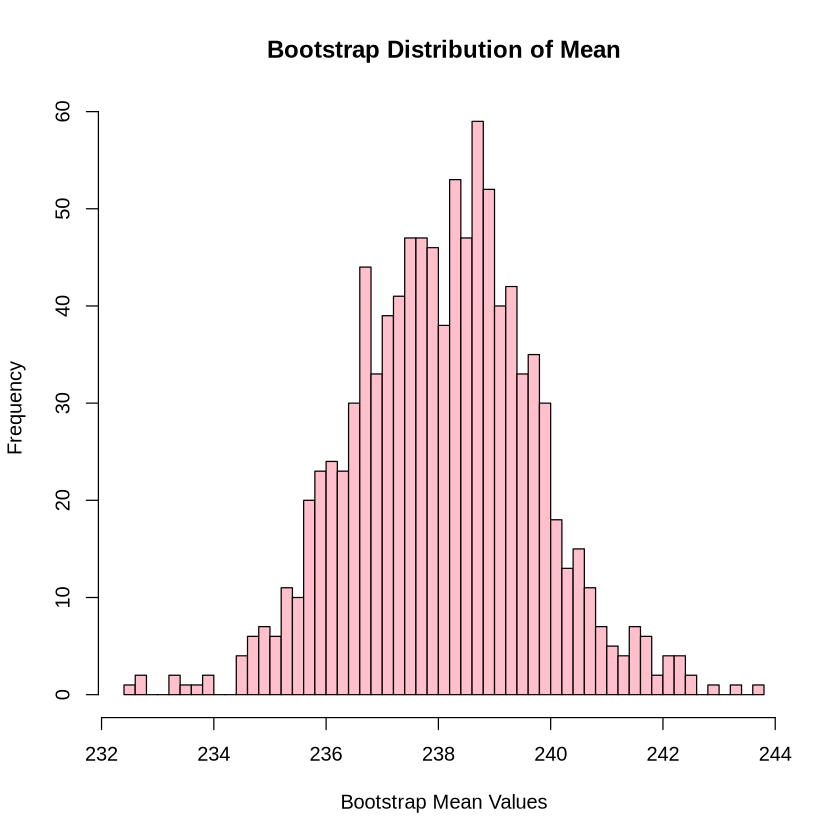

In [24]:
#plotting histogram 
hist(boot_obj_mean$t,
     main='Bootstrap Distribution of Mean',
     xlab='Bootstrap Mean Values',
     col='pink',
     border='black',
     breaks = 40)
#save plot to use it later 
hist_mean <- recordPlot()

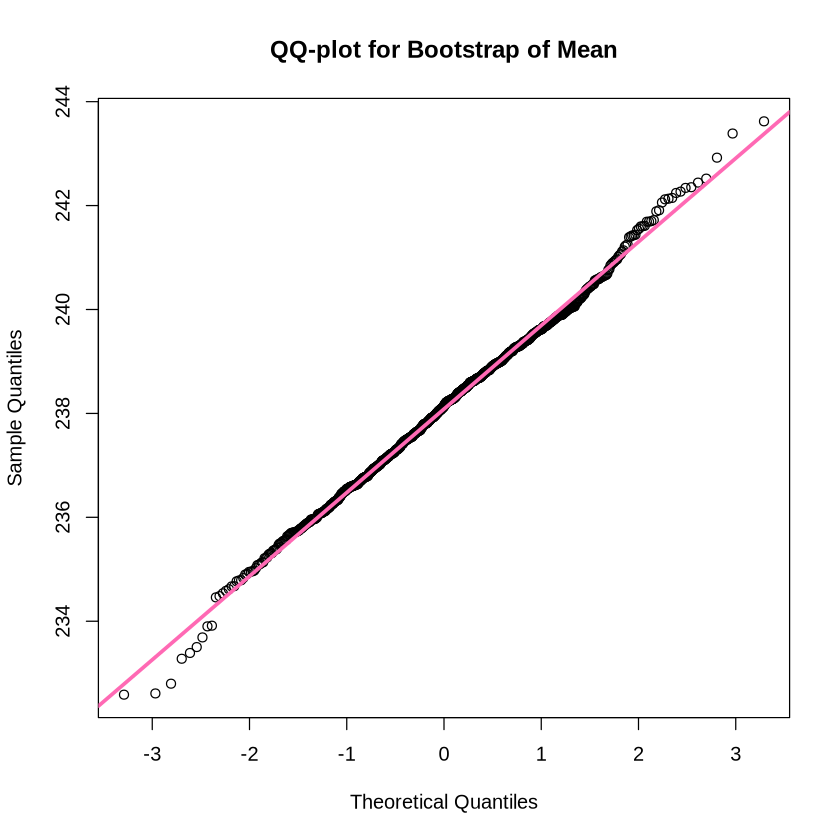

In [25]:
#plotting qqplot
qqnorm(boot_obj_mean$t,main="QQ-plot for Bootstrap of Mean")
qqline(boot_obj_mean$t, col='hotpink',lwd=3)            
qq_mean <- recordPlot()

In [26]:
#Confidence Interval for mean 

#68% 
CI_mean_68 <- boot.ci(boot_obj_mean, conf=0.68, type = c('norm','basic','perc'))
#95%
CI_mean_95 <- boot.ci(boot_obj_mean, conf=0.95, type = c('norm','basic','perc'))

In [27]:
#Confidence interval for mean using t-distribution 
#metrics 
mean_v <- mean(dt$pm2_5,) #mean
sd_v <- sd(dt$pm2_5) #standard deviation 
n <- length(dt$pm2_5) #length 
df_t <- n-1 #degree of freedom 

#t-value for 68%
t_v_68 <- qt(0.84, df=df_t)

#t-value for 95%
t_v_95 <- qt(0.975,df=df_t)

#calculating CI for the mean using t-distribution 
#68%
CI_mean_t_68 <- c(mean_v - t_v_68 * sd_v / sqrt(n), mean_v + t_v_68 * sd_v / sqrt(n))
#95%
CI_mean_t_95 <- c(mean_v - t_v_95 * sd_v / sqrt(n), mean_v + t_v_95 * sd_v / sqrt(n))

In [28]:
#comparing values 
#68%
cat("Bootstrap CI for Mean (68%): ", CI_mean_68$normal[2],'-',CI_mean_68$normal[3], "\n")
cat("t-distribution CI for Mean (68%): ", CI_mean_t_68, "\n",'\n')
#95%
cat("Bootstrap CI for Mean (95%): ", CI_mean_95$normal[2],'-',CI_mean_95$normal[3], "\n")
cat("t-distribution CI for Mean (95%): ", CI_mean_t_95, "\n")

Bootstrap CI for Mean (68%):  236.5633 - 239.7635 
t-distribution CI for Mean (68%):  236.4862 239.7744 
 
Bootstrap CI for Mean (95%):  235.0098 - 241.3171 
t-distribution CI for Mean (95%):  234.8898 241.3708 


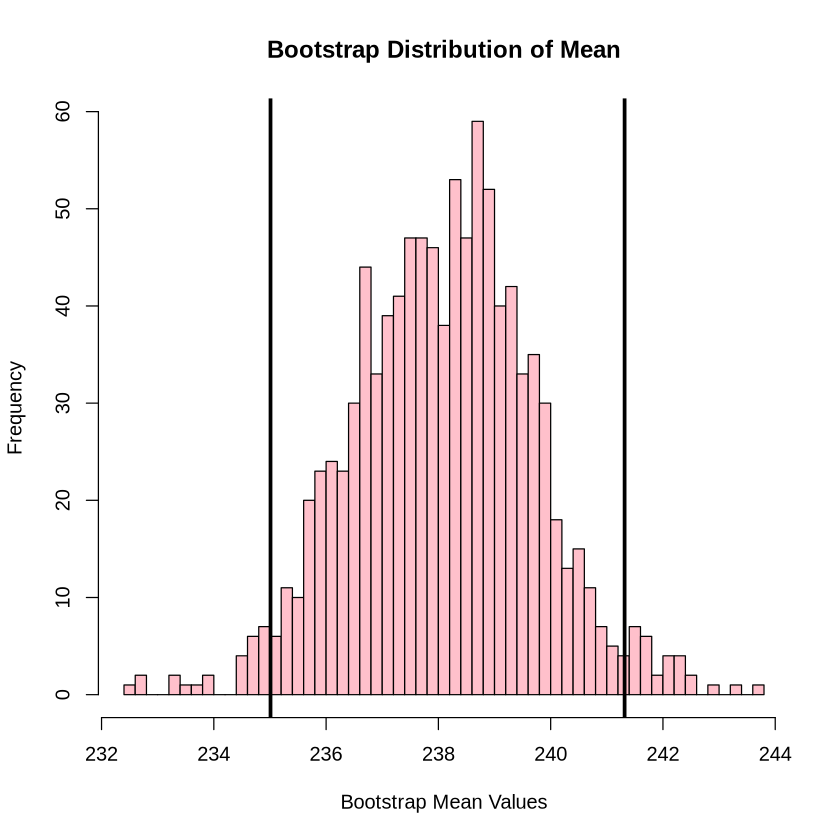

In [29]:
#adding the line to the histogram 
replayPlot(hist_mean)
abline(v=CI_mean_95$normal[2],col='black',lwd=3)
abline(v=CI_mean_95$normal[3],col='black',lwd=3)

Doing standard deviation now

In [30]:
#function to get standard deviation
stat_fun_sd <- function(x,idx)sd(x[idx])
#applying boostrap using a function 
boot_obj_sd <- boot(dt$pm2_5, R=1000, statistic=stat_fun_sd)
boot_obj_sd


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = dt$pm2_5, statistic = stat_fun_sd, R = 1000)


Bootstrap Statistics :
    original     bias    std. error
t1* 226.5336 -0.0575538    2.114784

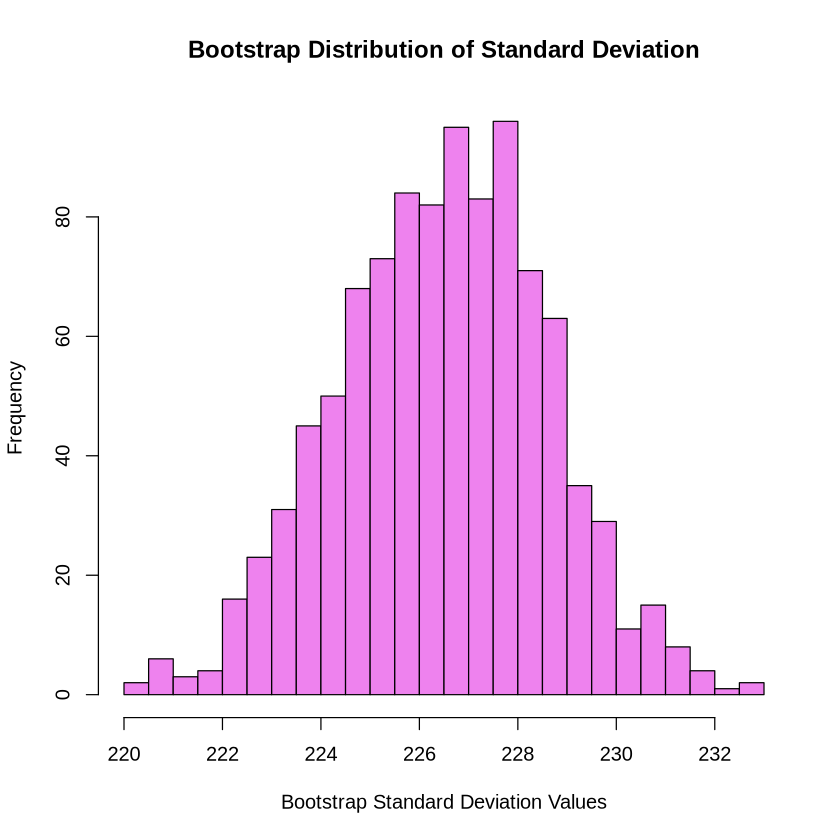

In [31]:
#plotting histogram 
hist(boot_obj_sd$t,
     main='Bootstrap Distribution of Standard Deviation',
     xlab='Bootstrap Standard Deviation Values',
     col='violet',
     border='black',
     breaks = 40)
#save plot to use it later 
hist_sd <- recordPlot()

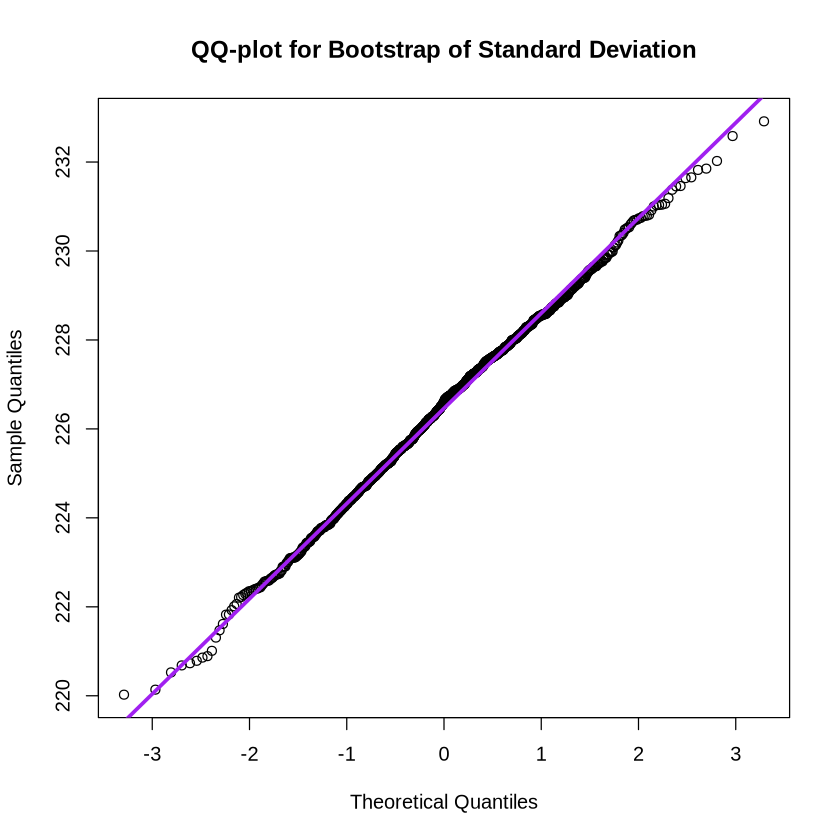

In [32]:
#plotting qqplot
qqnorm(boot_obj_sd$t,main="QQ-plot for Bootstrap of Standard Deviation")
qqline(boot_obj_sd$t, col='purple',lwd=3)            
qq_sd <- recordPlot()

In [33]:
#Confidence Interval for standard deviation
#68% 
CI_sd_68 <- boot.ci(boot_obj_sd, conf=0.68, type = c('norm','basic','perc'))
#95%
CI_sd_95 <- boot.ci(boot_obj_sd, conf=0.95, type = c('norm','basic','perc'))

In [34]:
#Confidence interval for standard deviation using chi-squared-distribution 
sd_v <- sd(dt$pm2_5) #standard deviation
n <- length(dt$pm2_5) #length 
df_t <- n-1 #degree of freedom 
#chi-squared-value for 68%
chi2_68_low <- qchisq(0.16, df = df_t)
chi2_68_high <- qchisq(0.84, df = df_t)

#chi-squared-value for 95%
chi2_95_low <- qchisq(0.025, df = df_t)
chi2_95_high <- qchisq(0.975, df = df_t)

#calculating CI for the mean using chi-squared-distribution 
#68%
CI_sd_68_l <- sqrt(((n-1) * sd_v^2) / chi2_68_high) 
CI_sd_68_u <- sqrt(((n-1) * sd_v^2) / chi2_68_low)
#95%
CI_sd_95_l <- sqrt(((n-1) * sd_v^2) / chi2_95_high) 
CI_sd_95_u <- sqrt(((n-1) * sd_v^2) / chi2_95_low)

In [35]:
#comparing values 
#68%
cat("Bootstrap CI for Standart Deviation (68%): ", CI_sd_68$normal[2],'-',CI_sd_68$normal[3], "\n")
cat("t-distribution CI for Mean (68%): ",CI_sd_68_u,'-',CI_sd_68_l, "\n",'\n')
#95%
cat("Bootstrap CI for Mean (95%): ", CI_sd_95$normal[2],'-',CI_sd_95$normal[3], "\n")
cat("t-distribution CI for Mean (95%): ",CI_sd_95_u,'-',CI_sd_95_l, "\n")

Bootstrap CI for Standart Deviation (68%):  224.4881 - 228.6942 
t-distribution CI for Mean (68%):  227.7052 - 225.38 
 
Bootstrap CI for Mean (95%):  222.4463 - 230.7361 
t-distribution CI for Mean (95%):  228.8484 - 224.2655 


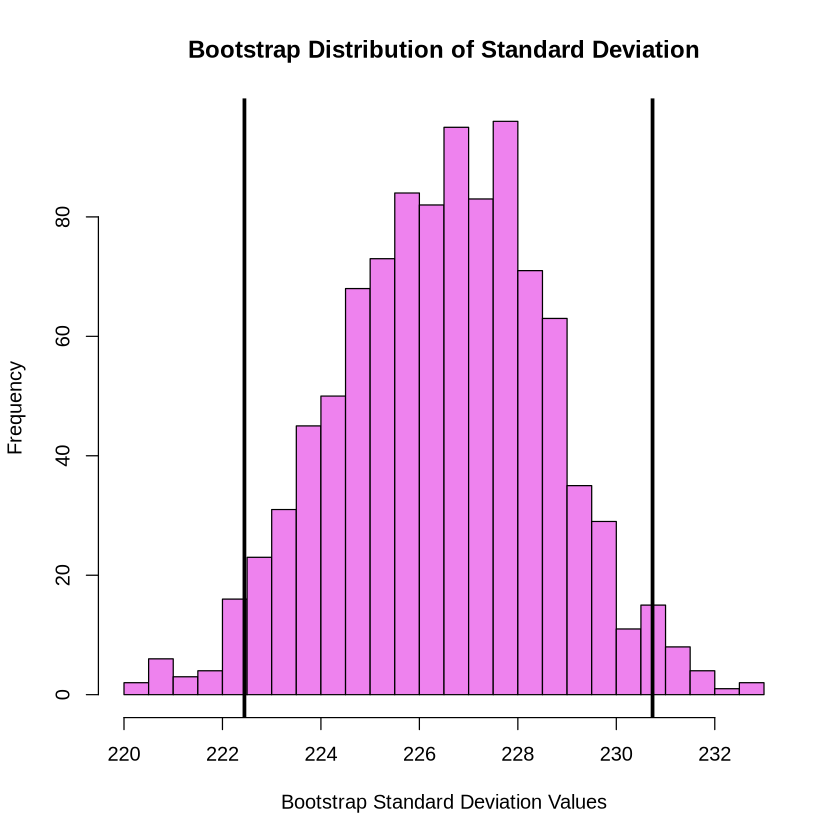

In [36]:
#adding the line to the histogram 
replayPlot(hist_sd)
abline(v=CI_sd_95$normal[2],col='black',lwd=3)
abline(v=CI_sd_95$normal[3],col='black',lwd=3)